In [1]:
# Belirleyici durumlar. NOX > 50 -> NOX < 50 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("HousingData_Clean.csv",index_col=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [3]:
X= df.drop(columns=["MEDV"]) 
y= df["MEDV"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mae

2.776796292821953

In [11]:
mse = mean_squared_error(y_test,y_pred)
mse

13.016181076408452

In [12]:
r2 = r2_score(y_test, y_pred)
r2

0.8253168657507561

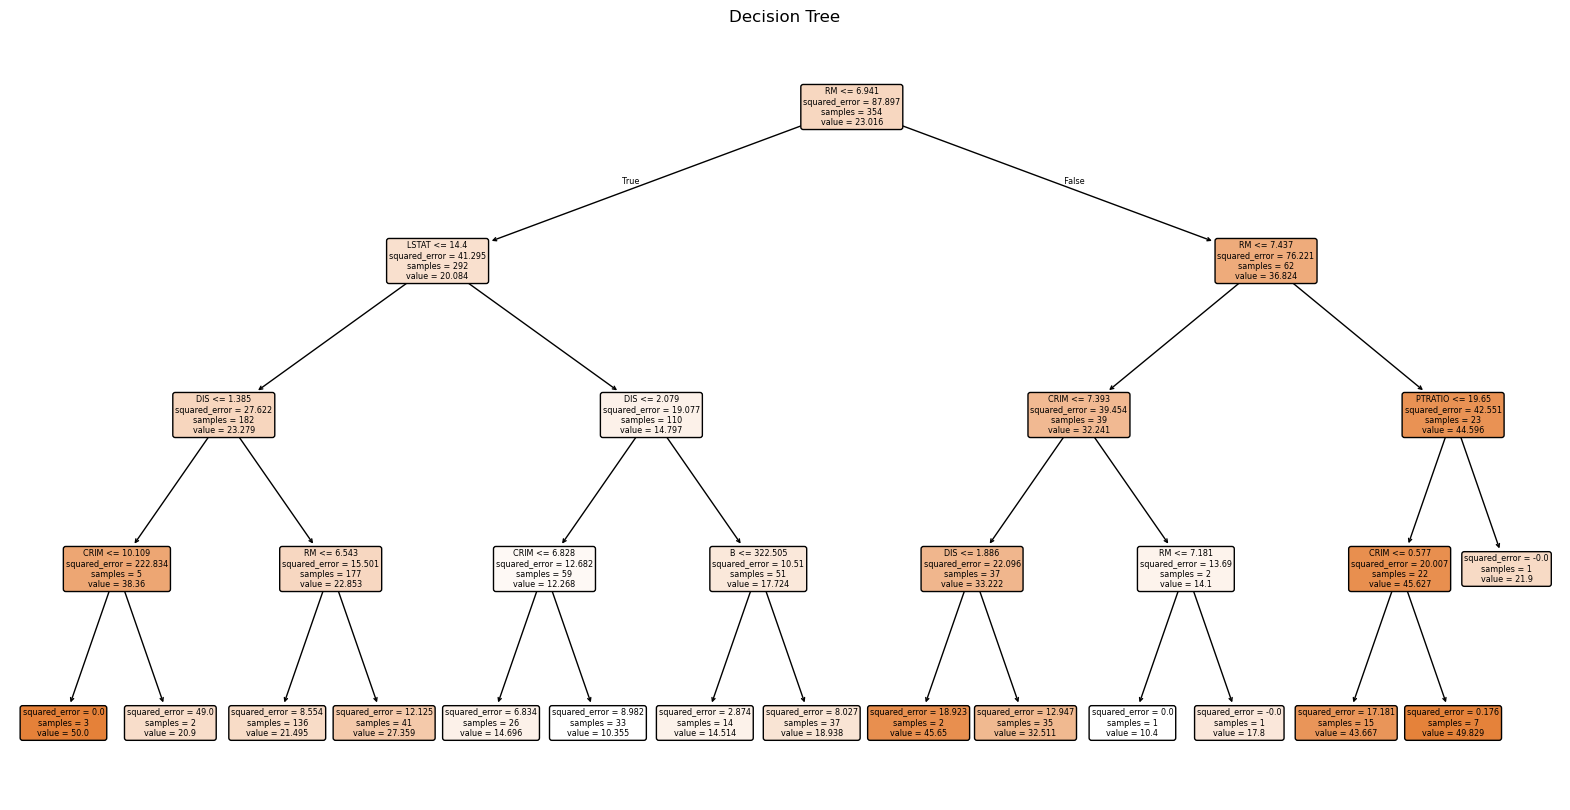

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

<Axes: >

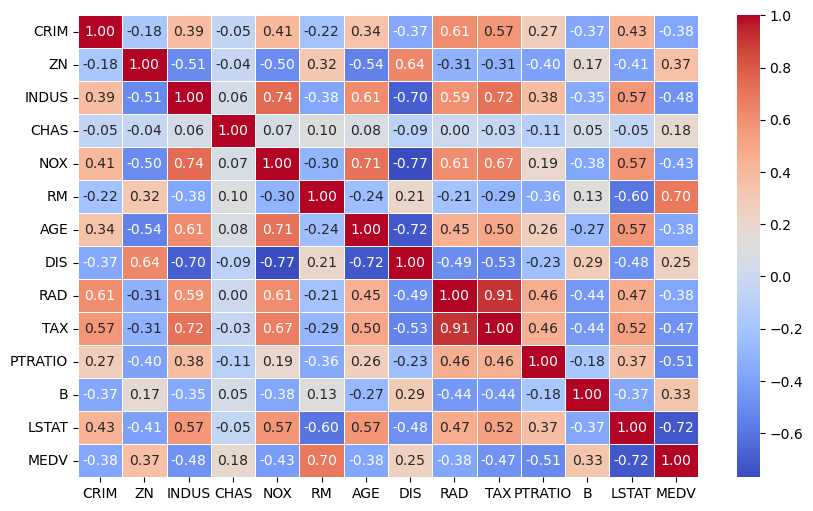

In [14]:
import seaborn as sb

plt.figure(figsize=(10,6))
sb.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

In [15]:
#Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
model2 = RandomForestRegressor(n_estimators=100,random_state=42) # n_estimators=>
model2.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [18]:
y_pred2 = model2.predict(X_test)

In [19]:
mae2 = mean_absolute_error(y_test, y_pred2)
mae2

2.123690789473684

In [20]:
# Overfitting => Veriyi ezberlemek, öğrenmek değil.

In [21]:
#GridSearchCV, RandomSearchCV
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    "n_estimators": list(range(5,30))
}

In [23]:
grid = GridSearchCV(RandomForestRegressor(), param_grid, scoring="r2")
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          16, 17, 18, 19, 20, 21, 22, 23, 24,
                                          25, 26, 27, 28, 29]},
             scoring='r2')

In [66]:
grid.best_params_, grid.best_score_

({'n_estimators': 18}, np.float64(0.8406976987432191))